# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set_style("whitegrid")

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# Preprocessing, Analysis and EDA

## Getting Our Data

In [2]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Checking for Null Values

In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Checking for Faulty Values

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We can right away see some weird data, with RestingBP and Cholesterol have a minimum value of 0 which is not possible.

In [6]:
index_to_drop = list(data.loc[(data.RestingBP == 0) | (data.Cholesterol == 0)].index)
    
data.drop(index_to_drop, inplace=True)
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Now we have a clean dataset

## Count Plots

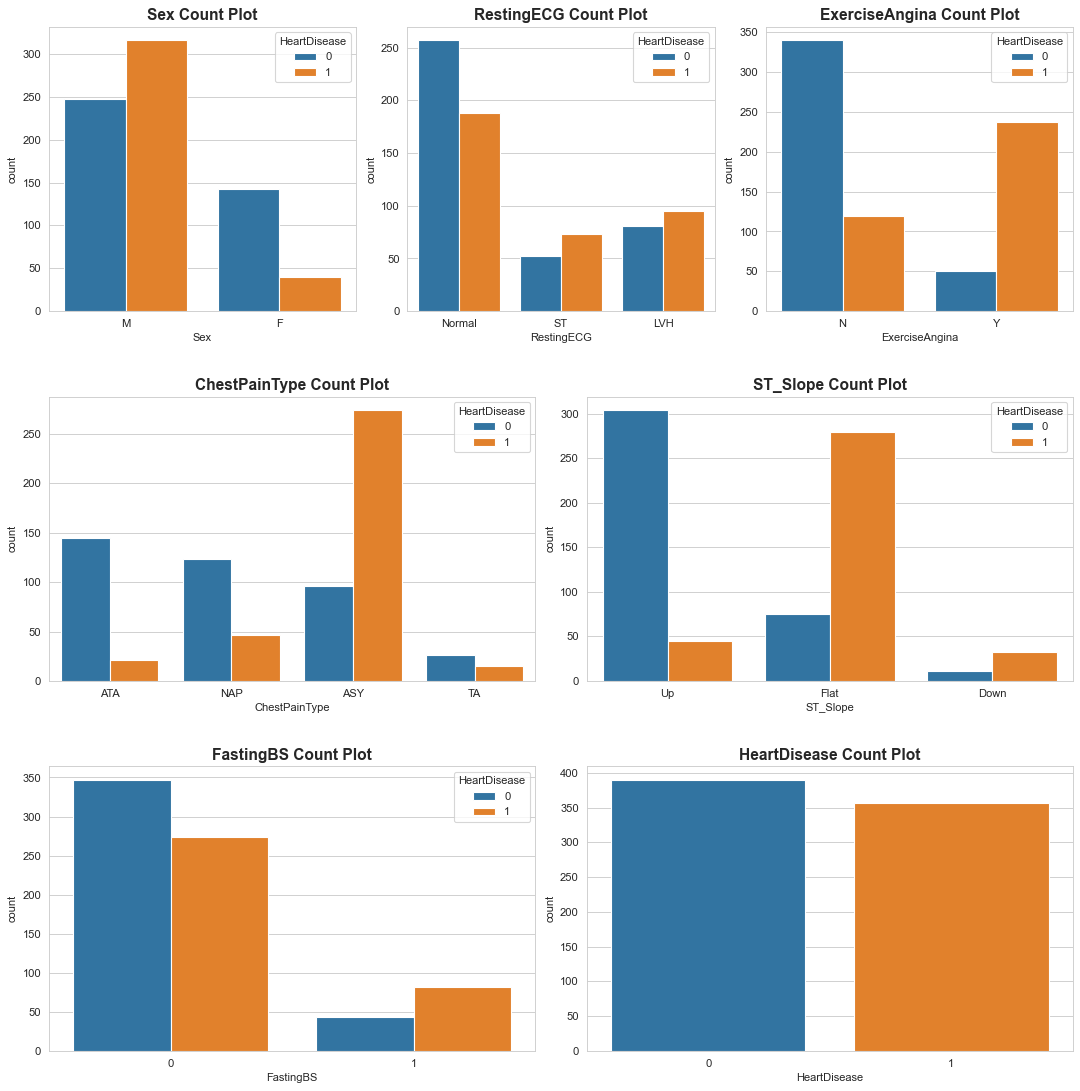

In [7]:
font_dict = {"fontsize": 14, "fontweight":"bold"}

fig = plt.figure(dpi=80, figsize=(16, 16))
gs = GridSpec(3, 6, figure=fig)

ax1 = fig.add_subplot(gs[0, :2])
sns.countplot(data=data, x="Sex", hue="HeartDisease", ax=ax1)
ax1.set_title("Sex Count Plot", fontdict=font_dict)

ax2 = fig.add_subplot(gs[0, 2:4])
sns.countplot(data=data, x="RestingECG", hue="HeartDisease", ax=ax2)
ax2.set_title("RestingECG Count Plot", fontdict=font_dict)

ax3 = fig.add_subplot(gs[0, 4:6])
sns.countplot(data=data, x="ExerciseAngina", hue="HeartDisease", ax=ax3)
ax3.set_title("ExerciseAngina Count Plot", fontdict=font_dict)

ax4 = fig.add_subplot(gs[1, :3])
sns.countplot(data=data, x="ChestPainType", hue="HeartDisease", ax=ax4)
ax4.set_title("ChestPainType Count Plot", fontdict=font_dict)

ax5 = fig.add_subplot(gs[1, 3:])
sns.countplot(data=data, x="ST_Slope", hue="HeartDisease", ax=ax5)
ax5.set_title("ST_Slope Count Plot", fontdict=font_dict)

ax6 = fig.add_subplot(gs[2, :3])
sns.countplot(data=data, x="FastingBS", hue="HeartDisease", ax=ax6)
ax6.set_title("FastingBS Count Plot", fontdict=font_dict)

ax7 = fig.add_subplot(gs[2, 3:])
sns.countplot(data=data, x="HeartDisease", ax=ax7)
ax7.set_title("HeartDisease Count Plot", fontdict=font_dict)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)

- In total we have <b>more males than females</b> and also more than half of the men in our data have Heart Disease.
- People with normal restingECG tend to have a higher chance of having a Heart Disease.
- People with ExerciseAnigna Y have a higher chance of having a Heart Disease.
- People with ASY type of Chest Pain indicates that the person has Heart Disease.
- People with Flat type of ST_Slope tend to have a Heart Disease.
- People without FastingBS are more likey to have a Heart Disease.

## Distribution Plots

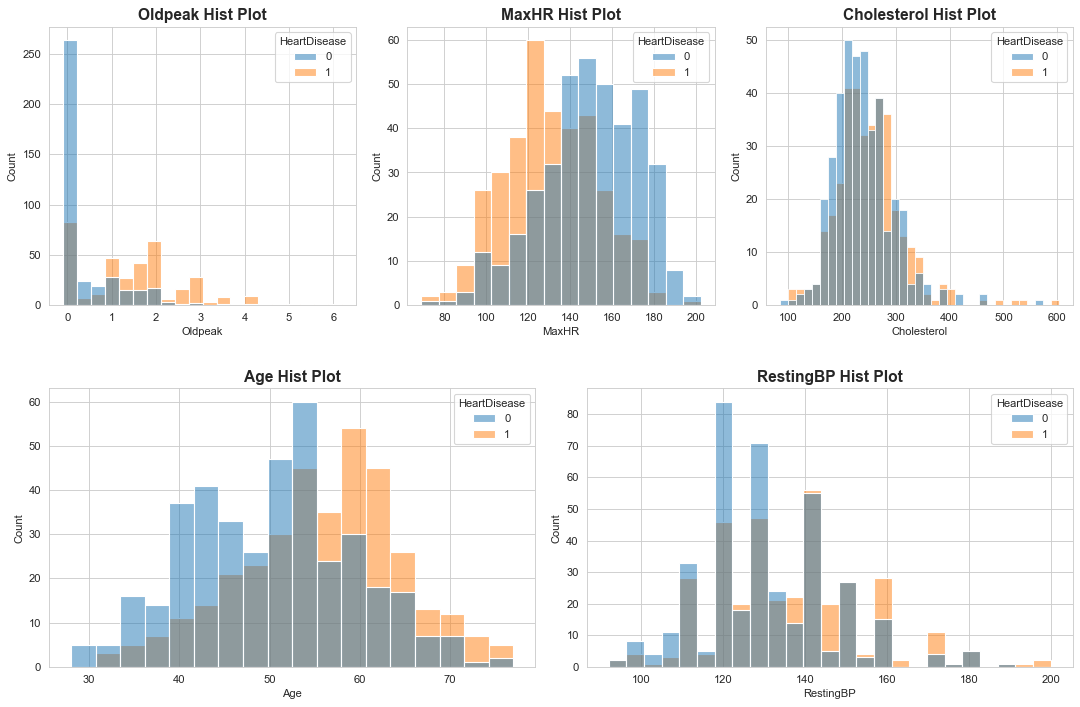

In [8]:
fig = plt.figure(dpi=80, figsize=(16, 10))
gs = GridSpec(2, 6, figure=fig)

ax1 = fig.add_subplot(gs[0, :2])
sns.histplot(data=data, x="Oldpeak", hue="HeartDisease", ax=ax1)
ax1.set_title("Oldpeak Hist Plot", fontdict=font_dict)

ax2 = fig.add_subplot(gs[0, 2:4])
sns.histplot(data=data, x="MaxHR", hue="HeartDisease", ax=ax2)
ax2.set_title("MaxHR Hist Plot", fontdict=font_dict)

ax3 = fig.add_subplot(gs[0, 4:6])
sns.histplot(data=data, x="Cholesterol", hue="HeartDisease", ax=ax3)
ax3.set_title("Cholesterol Hist Plot", fontdict=font_dict)

ax4 = fig.add_subplot(gs[1, :3])
sns.histplot(data=data, x="Age", hue="HeartDisease", ax=ax4)
ax4.set_title("Age Hist Plot", fontdict=font_dict)

ax5 = fig.add_subplot(gs[1, 3:])
sns.histplot(data=data, x="RestingBP", hue="HeartDisease", ax=ax5)
ax5.set_title("RestingBP Hist Plot", fontdict=font_dict)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)

People with 
- 0 - 2 Oldpeak
- 100 - 160 MaxHr
- late 50's - mid 60's
are likey to have a higher chance to have a Heart Disease

## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

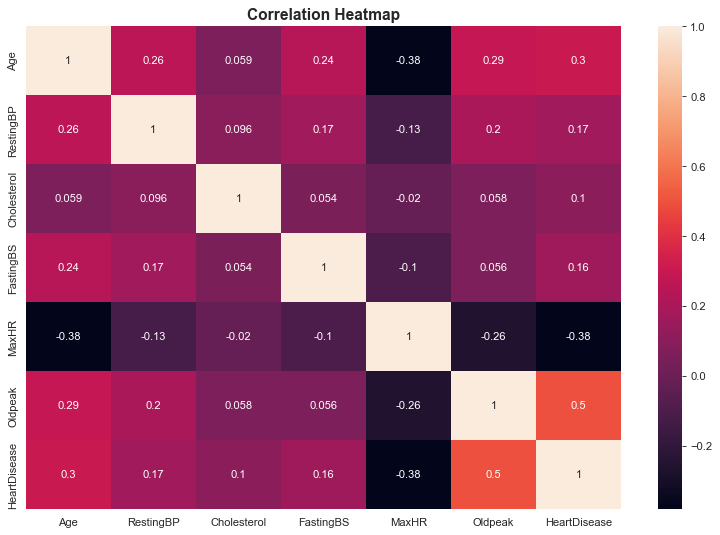

In [9]:
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(data=data.corr(), annot=True)
plt.title("Correlation Heatmap", fontdict=font_dict)

We see a very good relation between Oldpeak and HeartDisease. As Oldpeak Increases the Chance of Heart Disease Increases.

# Data Preparation and Classification Model

## Imports for Data Preparation

In [10]:
# Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

## Scaling the Continious Variables

In [11]:
sc = StandardScaler()

cols_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

data[cols_to_scale] = sc.fit_transform(data[cols_to_scale])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356073,M,ATA,0.403980,0.750494,0,Normal,1.296470,N,-0.840942,Up,0
1,-0.408656,F,NAP,1.561980,-1.093405,0,Normal,0.643613,N,0.091771,Flat,1
2,-1.671879,M,ATA,-0.175019,0.648995,0,ST,-1.722993,N,-0.840942,Up,0
3,-0.513925,F,ASY,0.288180,-0.518244,0,Normal,-1.314958,Y,0.558127,Flat,1
4,0.117686,M,NAP,0.982980,-0.839657,0,Normal,-0.743708,N,-0.840942,Up,0


## OneHotEncoding Categorical Variables

In [12]:
data = pd.get_dummies(data).reset_index()
data.head()

,index,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,-1.356073,0.403980,0.750494,0,1.296470,-0.840942,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1,-0.408656,1.561980,-1.093405,0,0.643613,0.091771,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,2,-1.671879,-0.175019,0.648995,0,-1.722993,-0.840942,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,3,-0.513925,0.288180,-0.518244,0,-1.314958,0.558127,1,1,0,...,0,0,0,1,0,0,1,0,1,0
4,4,0.117686,0.982980,-0.839657,0,-0.743708,-0.840942,0,0,1,...,1,0,0,1,0,1,0,0,0,1


## Filtering Our Outliers
Using Z-Score Method for filtering

In [13]:
z = np.abs(stats.zscore(data))

threshold = 2.5
print(np.where(z > 2.5))

(array([ 20,  28,  30,  68,  69,  76,  88,  98, 103, 109, 118, 119, 123,
       123, 149, 165, 166, 170, 182, 189, 190, 195, 199, 200, 208, 215,
       219, 237, 241, 245, 247, 250, 256, 274, 275, 278, 295, 302, 307,
       312, 319, 323, 330, 330, 330, 331, 334, 334, 338, 346, 351, 351,
       364, 365, 365, 369, 371, 375, 375, 377, 378, 381, 384, 387, 387,
       396, 398, 406, 413, 420, 420, 426, 431, 439, 444, 452, 452, 456,
       460, 461, 462, 476, 480, 495, 499, 506, 507, 507, 513, 528, 530,
       530, 530, 530, 544, 553, 560, 560, 560, 561, 561, 562, 567, 576,
       578, 586, 587, 599, 599, 601, 602, 603, 603, 608, 610, 612, 613,
       617, 619, 620, 623, 624, 631, 634, 641, 642, 648, 652, 653, 657,
       657, 671, 672, 678, 678, 683, 686, 686, 707, 717, 718, 728, 728,
       732, 735, 736, 741], dtype=int64), array([13,  3,  3,  6,  3,  3, 13,  3,  3,  2, 13, 13,  2,  3,  3, 13,  6,
        1,  3,  2,  2, 13, 13, 13,  1, 13,  1, 13,  2, 13, 19,  3,  3,  2,
        2,  2, 

In [14]:
data = data[(z < 2.5).all(axis=1)]
data.reset_index(inplace=True)
data.shape

(622, 23)

## Evenly Distribution the target variable across dataset

In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['HeartDisease']):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [16]:
X_train = train.drop("HeartDisease", axis=1)
y_train = train["HeartDisease"]

X_test = test.drop("HeartDisease", axis=1)
y_test = test["HeartDisease"]

# Testing Multiple Models

### Imports for Machine Learning Model

In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifierCV
from catboost import CatBoostClassifier

### Function to Test Models
The code below trains and tests the input classification algorithm along. Also it show ROC Curve and Precision - Recall Curve for the model along with confusion matrix and classification report

In [18]:
MLA_compare = pd.DataFrame()

row_index = 0

def MLA_testing(MLA, X_train, X_test, y_train, y_test, curves=True):  
    global row_index
    
    # Training The Model
    MLA.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = y_test, cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    if curves:
        # Precision - Recall Curve
        yhat = MLA.predict_proba(X_test)
        no_skill = len(data.HeartDisease[data.HeartDisease==1]) / len(data.HeartDisease)
        precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
        
        plt.figure(dpi=100, figsize=(15, 6))
        plt.subplot(121)
        sns.lineplot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
        plt.title("Recall vs Precision Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        
        # ROC Curve - Receiver Operating Characteristic
        plt.subplot(122)
        sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
        fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
        sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

    # Saving Data in Dataframe
    MLA_name = MLA.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    print(MLA_name, "Done")
    
    row_index+=1

## CatBoostClassifier

K-Fold Accuracies:
 [0.9        0.9        0.8        0.94       0.88       0.82
 0.92       0.7755102  0.87755102 0.91836735] 

Accuracy Score:
 0.872 

Confusion Matrix:
 [[59  9]
 [ 7 50]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        68
           1       0.85      0.88      0.86        57

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.87      0.87      0.87       125
 



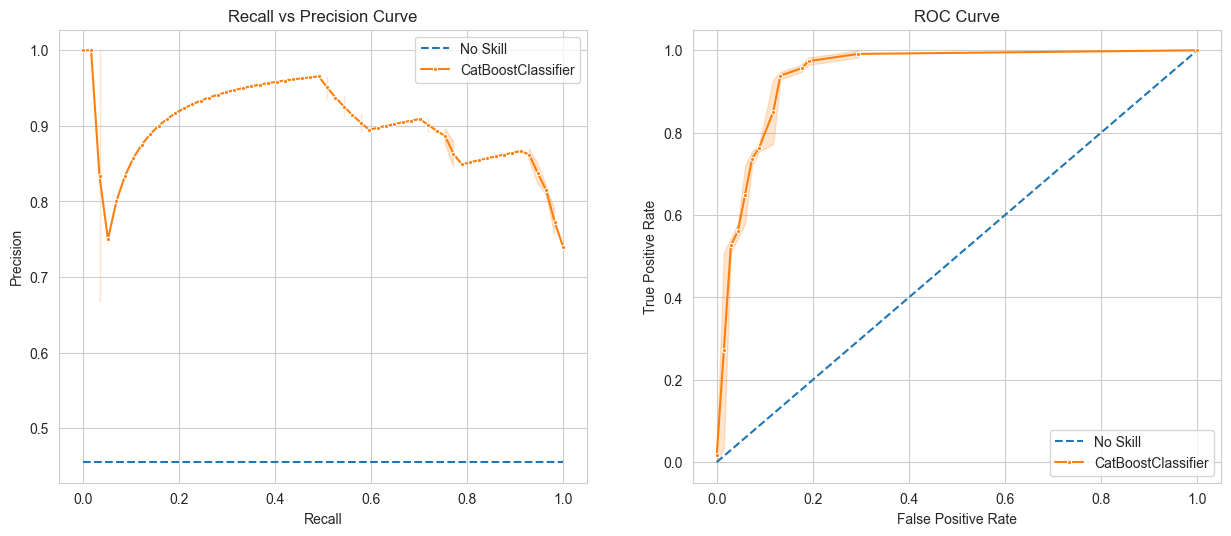

CatBoostClassifier Done


In [19]:
catboost_clf = CatBoostClassifier(silent=True)

MLA_testing(catboost_clf, X_train, X_test, y_train, y_test)

## RandomForestClassifier

K-Fold Accuracies:
 [0.88       0.9        0.84       0.9        0.84       0.84
 0.86       0.7755102  0.89795918 0.91836735] 

Accuracy Score:
 0.864 

Confusion Matrix:
 [[59  9]
 [ 8 49]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.84      0.86      0.85        57

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125
 



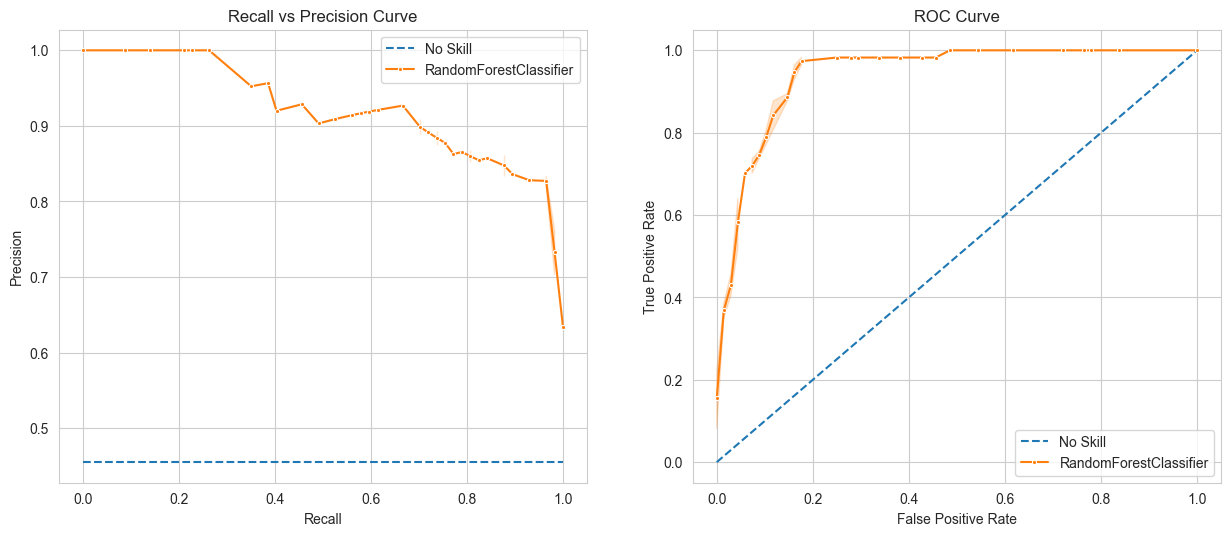

RandomForestClassifier Done


In [20]:
rf_clf = RandomForestClassifier()

MLA_testing(rf_clf, X_train, X_test, y_train, y_test)

## GradientBoostingClassifier

K-Fold Accuracies:
 [0.9        0.92       0.76       0.94       0.84       0.84
 0.9        0.79591837 0.79591837 0.93877551] 

Accuracy Score:
 0.848 

Confusion Matrix:
 [[58 10]
 [ 9 48]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        68
           1       0.83      0.84      0.83        57

    accuracy                           0.85       125
   macro avg       0.85      0.85      0.85       125
weighted avg       0.85      0.85      0.85       125
 



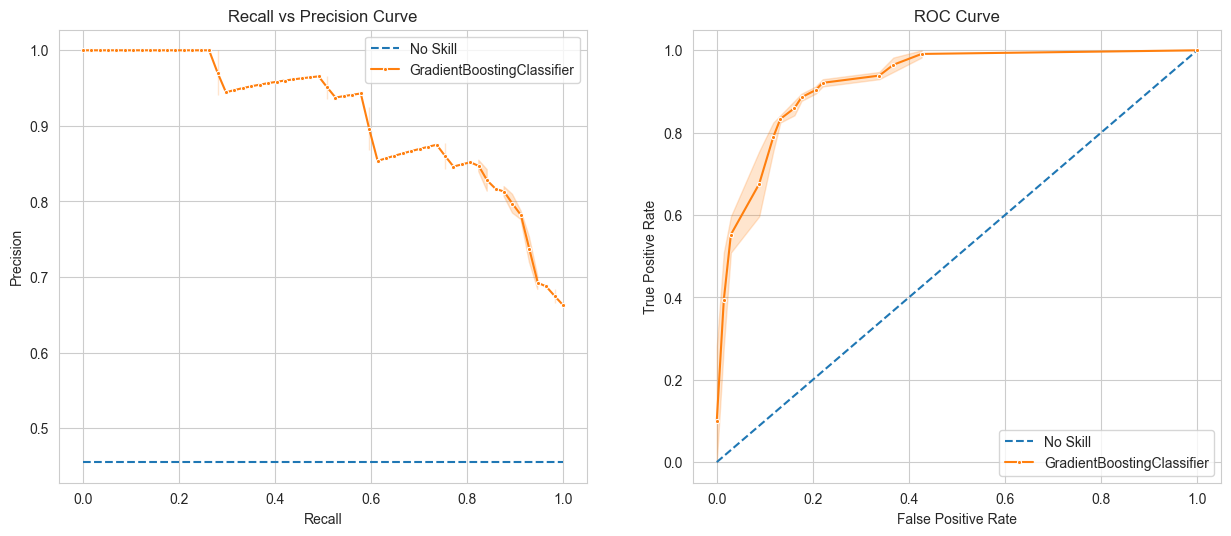

GradientBoostingClassifier Done


In [21]:
gb_clf = GradientBoostingClassifier()

MLA_testing(gb_clf, X_train, X_test, y_train, y_test)

## RidgeClassifierCV

In [22]:
ridge_clf = RidgeClassifierCV()

MLA_testing(ridge_clf, X_train, X_test, y_train, y_test, curves=False)

K-Fold Accuracies:
 [0.86       0.88       0.82       0.92       0.86       0.86
 0.9        0.79591837 0.89795918 0.91836735] 

Accuracy Score:
 0.872 

Confusion Matrix:
 [[58 10]
 [ 6 51]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88        68
           1       0.84      0.89      0.86        57

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.87      0.87      0.87       125
 

RidgeClassifierCV Done


## XGBClassifier

K-Fold Accuracies:
 [0.88       0.92       0.76       0.8        0.82       0.8
 0.9        0.79591837 0.81632653 0.85714286] 

Accuracy Score:
 0.856 

Confusion Matrix:
 [[59  9]
 [ 9 48]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        68
           1       0.84      0.84      0.84        57

    accuracy                           0.86       125
   macro avg       0.85      0.85      0.85       125
weighted avg       0.86      0.86      0.86       125
 



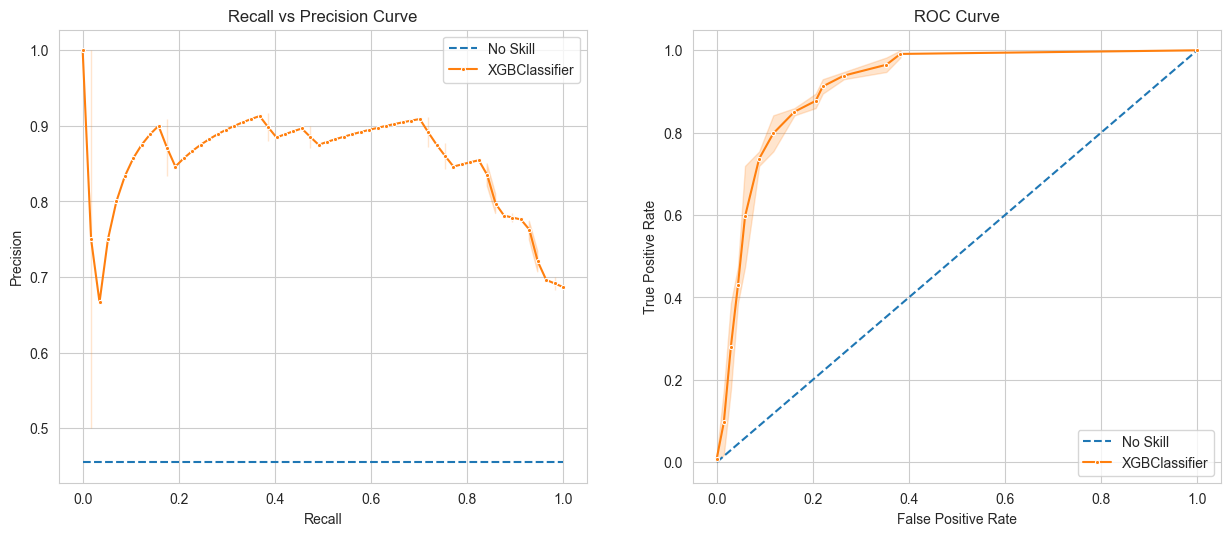

XGBClassifier Done


In [23]:
xgb_clf = XGBClassifier(eval_metric="logloss")

MLA_testing(xgb_clf, X_train, X_test, y_train, y_test)

In [24]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,CatBoostClassifier,87.2,87.314286
1,RidgeClassifierCV,87.2,87.122449
2,RandomForestClassifier,86.4,86.518367
3,GradientBoostingClassifier,84.8,86.306122
4,XGBClassifier,85.6,83.493878
